In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')

In [3]:
sns.set_style("ticks")

## Preparing the dataframes

In [4]:
df_all = pd.read_csv('data/dataport-export_gas_oct2015-mar2016.csv')
len(df_all)

1584823

In [5]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']))

In [6]:
display(df_all.head(), df_all.tail())

,localminute,dataid,meter_value
localminute,,,
2015-10-01 05:00:10,2015-10-01 00:00:10-05,739,88858
2015-10-01 05:00:13,2015-10-01 00:00:13-05,8890,197164
2015-10-01 05:00:20,2015-10-01 00:00:20-05,6910,179118
2015-10-01 05:00:22,2015-10-01 00:00:22-05,3635,151318
2015-10-01 05:00:22,2015-10-01 00:00:22-05,1507,390354


,localminute,dataid,meter_value
localminute,,,
2016-04-01 04:59:14.336743,2016-03-31 23:59:14.336743-05,2129,201726
2016-04-01 04:59:17.427165,2016-03-31 23:59:17.427165-05,2945,161232
2016-04-01 04:59:35.370782,2016-03-31 23:59:35.370782-05,9729,138146
2016-04-01 04:59:47.816286,2016-03-31 23:59:47.816286-05,5129,166488
2016-04-01 04:59:58.923080,2016-03-31 23:59:58.92308-05,484,114174


In [7]:
df_all = df_all.drop(columns='localminute')
display(df_all.head())

,dataid,meter_value
localminute,,
2015-10-01 05:00:10,739,88858
2015-10-01 05:00:13,8890,197164
2015-10-01 05:00:20,6910,179118
2015-10-01 05:00:22,3635,151318
2015-10-01 05:00:22,1507,390354


In [8]:
groups = df_all.groupby('dataid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

# check if each group (grouped by meter id) is sorted in ascending order by datetime.
# for key in keys:
#     df_i = groups.get_group(key)
#     print(df_i.index.is_monotonic_increasing)
# each group is already sorted in ascending order by datetime.

### Check meterids

In [9]:
keys_list = list(keys)
print(keys_list)

[35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2645, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4671, 4732, 4767, 4874, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5545, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6101, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7566, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9620, 9631, 9639, 9729, 9766, 9849, 9956, 9982]


### Print full-length (6 mth) plot by meterid.

In [10]:
# for key in keys_list:    
#     df_i = groups.get_group(key)
#     df_i.drop(columns='dataid').plot(figsize=(15,4), title=str(f'meter {key}'))

In [41]:
key = 3134
df_i = groups.get_group(key)

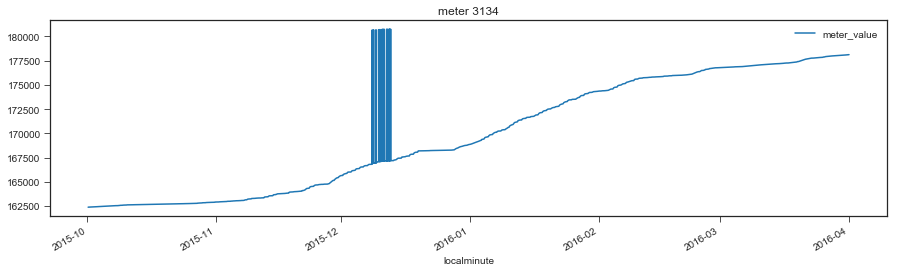

In [42]:
df_i.drop(columns='dataid').plot(figsize=(15,4), title=str(f'meter {key}'))

### Select data by datetime period. e.g. 1 month. i.e. Zoom in.

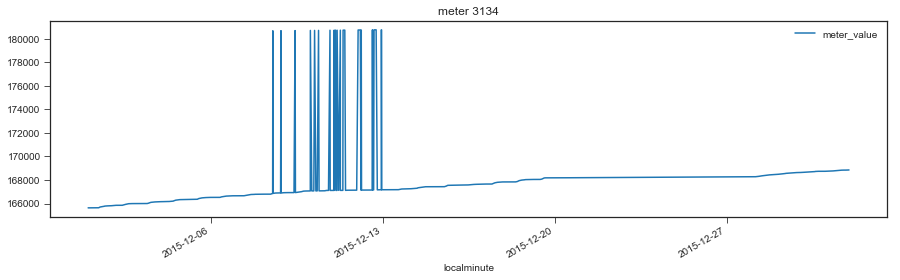

In [43]:
def zoom(df, start_date, end_date):
    # pre-condition: df is indexed by datetime.
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    mask = (df.index > start_date) & (df.index <= end_date)

    new_df = df.iloc[mask]
    return new_df
    
df_i_bymonth = zoom(df_i, '2015-12-01', '2016-01-01').drop(columns='dataid')
df_i_bymonth.plot(figsize=(15,4), title=str(f'meter {key}'))

### Resample with hourly frequency.

744

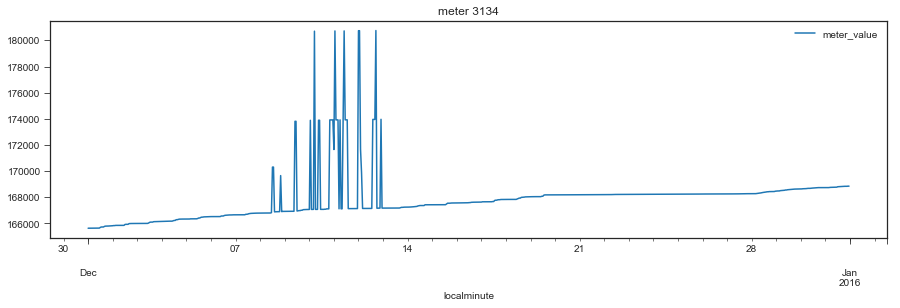

In [44]:
df_i_bymonth_resampled = df_i_bymonth.resample('H').mean().ffill()
df_i_bymonth_resampled.plot(figsize=(15,4), title=str(f'meter {key}'))
display(len(df_i_bymonth_resampled))

### Iterate and plot december's hourly-resampled data for each suspicious meter (spiking values).

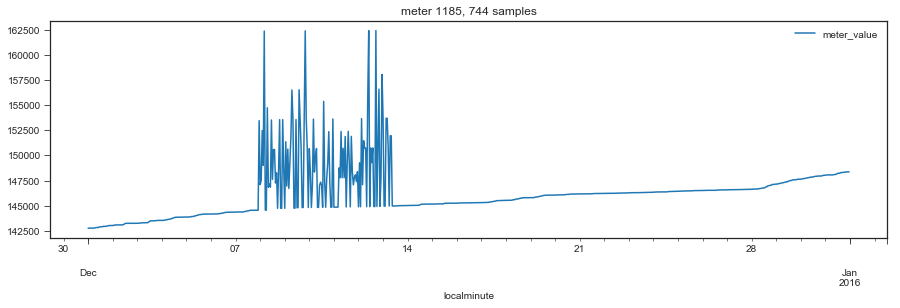

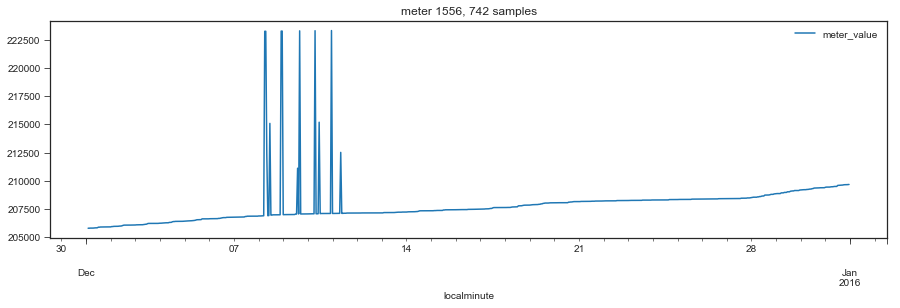

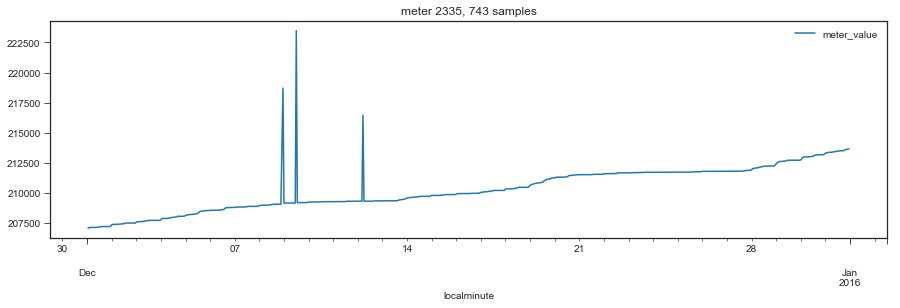

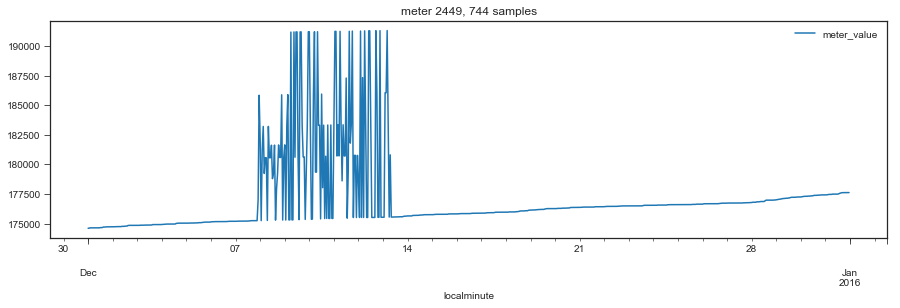

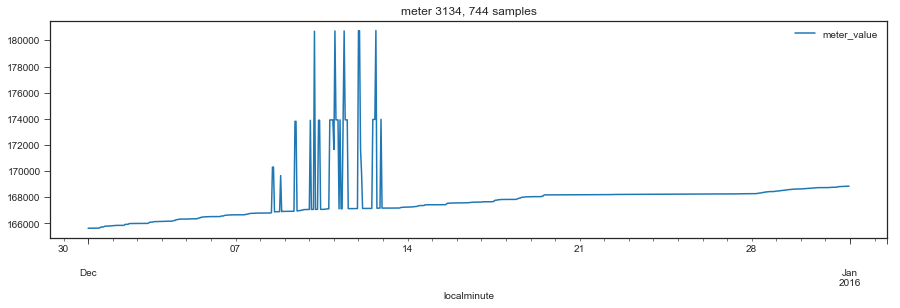

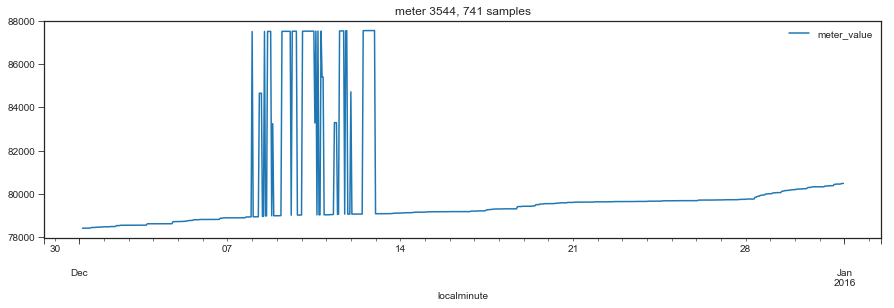

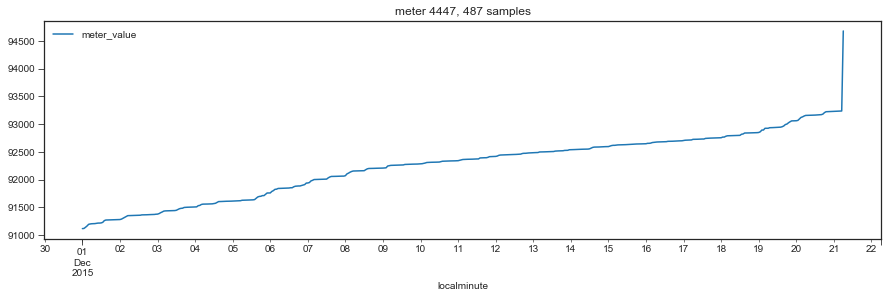

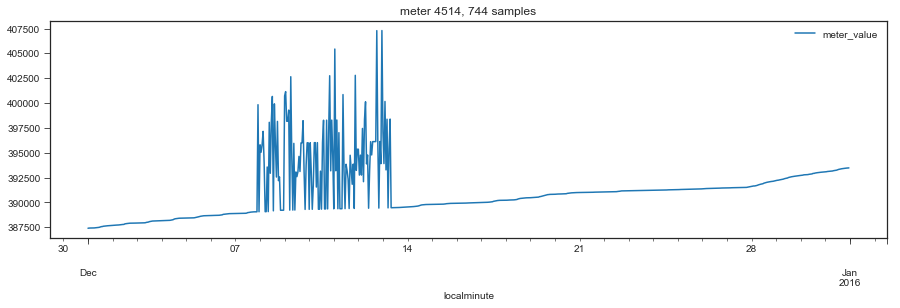

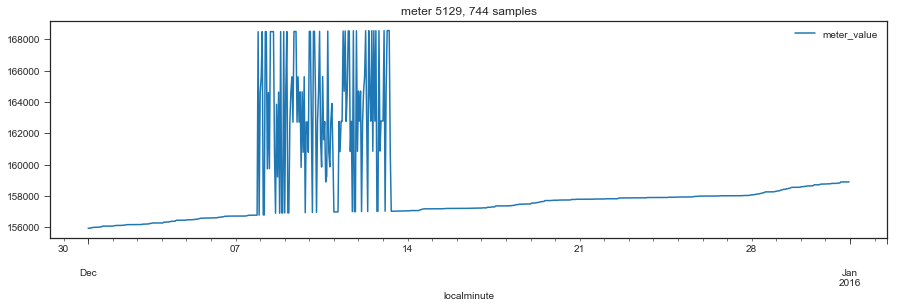

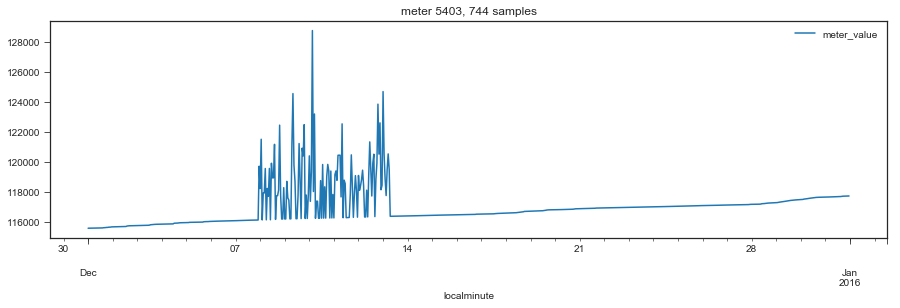

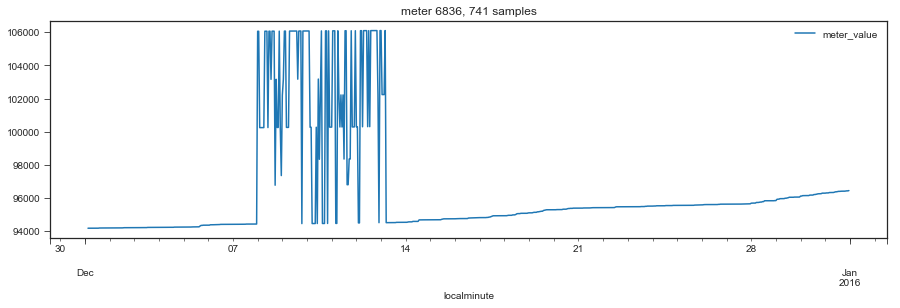

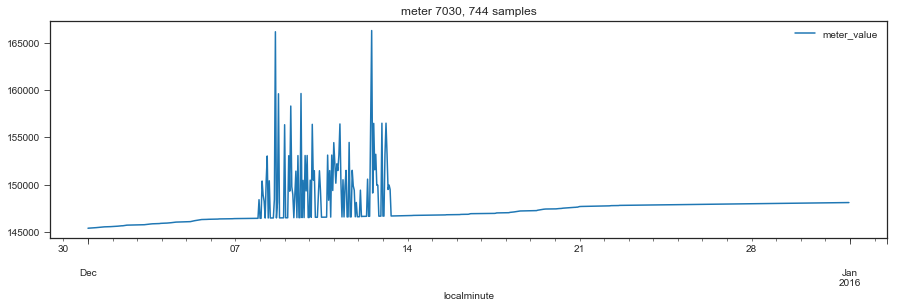

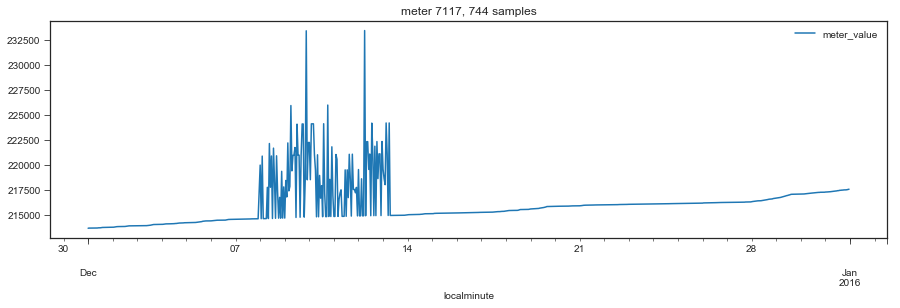

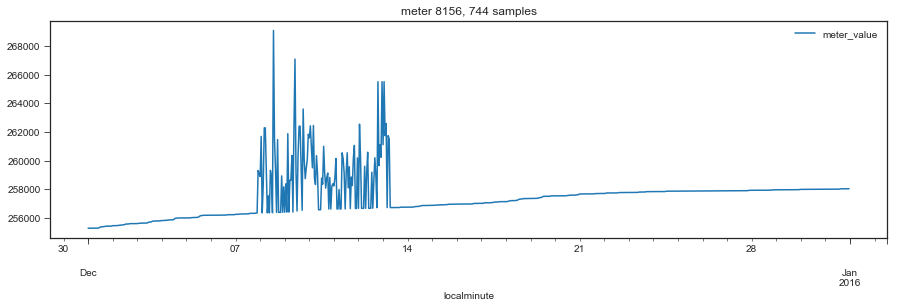

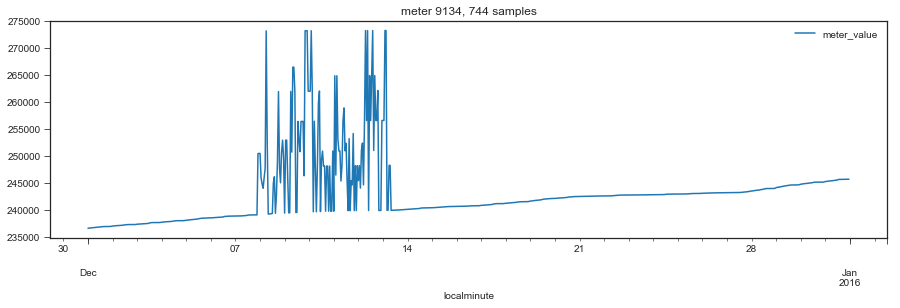

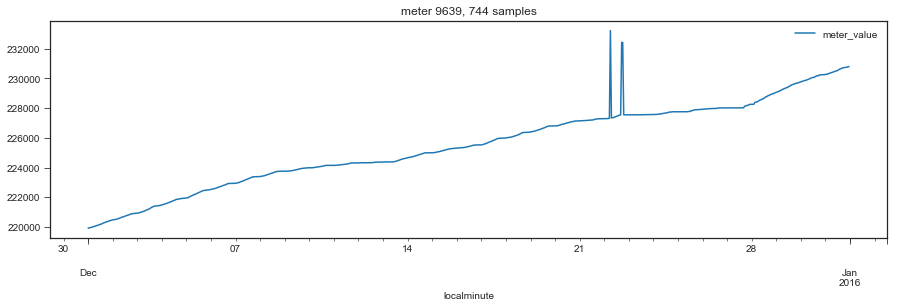

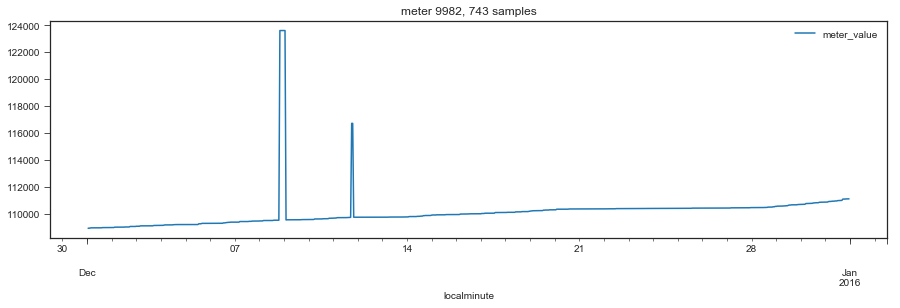

In [54]:
suspicious_meters_list = [1185, 1556, 2335, 2449, 3134, 3544, 4447, 4514, \
                          5129, 5403,6836, 7030, 7117, 8156, 9134, 9639, 9982]

for meter in suspicious_meters_list:
    df_i = groups.get_group(meter)
    df_i_bymonth = zoom(df_i, '2015-12-01', '2016-01-01').drop(columns='dataid')
    df_i_bymonth_resampled = df_i_bymonth.resample('H').mean().ffill()
    df_i_bymonth_resampled.plot(figsize=(15,4), title=str(f'meter {meter}, {len(df_i_bymonth_resampled)} samples'))


We clearly see that there is some obvious malfunctioning happening within 7-14 Dec 2015.

### Zoom in deeper within the time period (e.g. one day/24h)

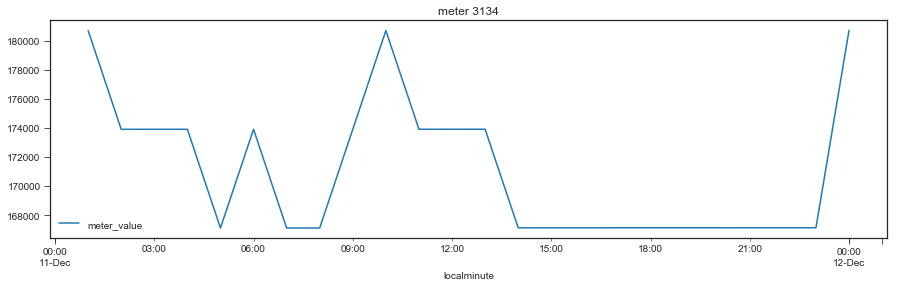

In [46]:
df_i_byday = zoom(df_i_bymonth_resampled, '2015-12-11', '2015-12-12')
df_i_byday.plot(figsize=(15,4), title=str(f'meter {key}'))

In [ ]:
# for i in range(7):
#     start_date = f'2015-12-{8+i}'
#     end_date = f'2015-12-{9+i}'
#     df_i_byday = zoom(df_i_bymonth_resampled, start_date, end_date)
#     df_i_byday.plot(figsize=(15,4), title=str(f'meter {key}'))

In [89]:
less500_readings_list = [4874,  6101, 9620, 7566, 5545, 2814, 2946, 2755,\
                         9160, 2645, 6685, 1403, 8703, 9600, 3036, 5658]

for meter in less500_readings_list:
    df_i = groups.get_group(meter).drop(columns='dataid')
    df_i_resample_monthly_count = df_i.resample('M').count()  # get count of samples per month
    df_i_resample_monthly_count = df_i_resample_monthly_count.rename(columns={'meter_value': 'count'})
    display(df_i_resample_monthly_count.head(6), len(df_i_resample_monthly_count))
    display(len(df_i)/len(df_i_resample_monthly_count))  # get average samples per month within first and last sample time.
#     df_i_resample_monthly_count.plot(title=f'meter {meter}, {len(df_i)} samples')



,count
localminute,
2016-02-29,1
2016-03-31,1


2

1.0

,count
localminute,
2016-01-31,3


1

3.0

,count
localminute,
2015-10-31,1
2015-11-30,0
2015-12-31,0
2016-01-31,3
2016-02-29,13
2016-03-31,6


6

3.8333333333333335

,count
localminute,
2016-01-31,32


1

32.0

,count
localminute,
2015-12-31,3
2016-01-31,16
2016-02-29,13
2016-03-31,1


4

8.25

,count
localminute,
2016-01-31,6
2016-02-29,31


2

18.5

,count
localminute,
2016-01-31,45


1

45.0

,count
localminute,
2016-01-31,68


1

68.0

,count
localminute,
2016-01-31,72


1

72.0

,count
localminute,
2015-10-31,12
2015-11-30,10
2015-12-31,1
2016-01-31,19
2016-02-29,32


5

14.8

,count
localminute,
2015-10-31,1
2015-11-30,0
2015-12-31,14
2016-01-31,21
2016-02-29,39
2016-03-31,3


6

13.0

,count
localminute,
2016-01-31,202


1

202.0

,count
localminute,
2015-10-31,134
2015-11-30,0
2015-12-31,3
2016-01-31,117
2016-02-29,3
2016-03-31,1


6

43.0

,count
localminute,
2016-01-31,330


1

330.0

,count
localminute,
2016-01-31,336


1

336.0

,count
localminute,
2015-11-30,98
2015-12-31,176
2016-01-31,201
2016-02-29,16
2016-03-31,2


5

98.6

In [83]:
count_list = []
for key in keys_list:
    df_i = groups.get_group(key)
    count_list.append(len(df_i.index))
    
less2000_mask = np.asarray(count_list) < 2000
display(less2000_mask)

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,

In [85]:
less2000_list = []
for i in range(len(less2000_mask)):
    if less2000_mask[i] == True:
        less2000_list.append(keys_list[i])

%pprint
display(less2000_list)

Pretty printing has been turned OFF


[44, 187, 1103, 1403, 1415, 1792, 2470, 2645, 2755, 2814, 2818, 2946, 3036, 3849, 4193, 4228, 4296, 4356, 4373, 4671, 4874, 5317, 5395, 5545, 5658, 6101, 6505, 6578, 6685, 6863, 7566, 7965, 8059, 8244, 8386, 8703, 9160, 9600, 9620, 9956, 9982]

In [87]:
for meter in less2000_list:
    df_i = groups.get_group(meter).drop(columns='dataid')
    df_i_resample_monthly_count = df_i.resample('M').count()  # get count of samples per month
#     display(df_i_resample_monthly_count.head(10), len(df_i_resample_monthly_count))
    # get average samples per month within first and last sample time.
    display(len(df_i)/len(df_i_resample_monthly_count), f'nmonths={len(df_i_resample_monthly_count)}')  
#     df_i_resample_monthly_count.plot(title=f'meter {meter}, {len(df_i)} samples')

258.1666666666667

'nmonths=6'

152.33333333333334

'nmonths=6'

139.2

'nmonths=5'

202.0

'nmonths=1'

155.0

'nmonths=6'

274.3333333333333

'nmonths=6'

242.16666666666666

'nmonths=6'

14.8

'nmonths=5'

68.0

'nmonths=1'

18.5

'nmonths=2'

122.0

'nmonths=6'

45.0

'nmonths=1'

336.0

'nmonths=1'

260.5

'nmonths=6'

169.83333333333334

'nmonths=6'

114.14285714285714

'nmonths=7'

168.0

'nmonths=7'

320.6666666666667

'nmonths=6'

282.0

'nmonths=6'

4.2

'nmonths=5'

1.0

'nmonths=2'

1039.0

'nmonths=1'

220.71428571428572

'nmonths=7'

8.25

'nmonths=4'

98.6

'nmonths=5'

3.0

'nmonths=1'

266.0

'nmonths=7'

232.0

'nmonths=4'

13.0

'nmonths=6'

112.0

'nmonths=6'

32.0

'nmonths=1'

106.83333333333333

'nmonths=6'

88.16666666666667

'nmonths=6'

919.0

'nmonths=1'

120.6

'nmonths=5'

43.0

'nmonths=6'

72.0

'nmonths=1'

330.0

'nmonths=1'

3.8333333333333335

'nmonths=6'

258.4

'nmonths=5'

256.6666666666667

'nmonths=6'